In [3]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Training data
train_dataset = pd.read_csv('Datasets/Experian/application_train.csv')

print('Train data shape: ', train_dataset.shape)

train_dataset.head()

Train data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
keep_cols = ['TARGET', 'NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL', 'CODE_GENDER', 'CNT_CHILDREN',
             'FLAG_OWN_REALTY', 'AMT_CREDIT', 'APARTMENTS_AVG', 'OCCUPATION_TYPE', 
             'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'DAYS_BIRTH']

train_dataset = train_dataset.filter(items=keep_cols)

print('Train data shape: ', train_dataset.shape)

Train data shape:  (307511, 14)


In [6]:
train_dataset.head()

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,CODE_GENDER,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_CREDIT,APARTMENTS_AVG,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,DAYS_BIRTH
0,1,Cash loans,202500.0,M,0,Y,406597.5,0.0247,Laborers,1.0,Business Entity Type 3,Single / not married,-637,-9461
1,0,Cash loans,270000.0,F,0,N,1293502.5,0.0959,Core staff,2.0,School,Married,-1188,-16765
2,0,Revolving loans,67500.0,M,0,Y,135000.0,NaN,Laborers,1.0,Government,Single / not married,-225,-19046
3,0,Cash loans,135000.0,F,0,Y,312682.5,NaN,Laborers,2.0,Business Entity Type 3,Civil marriage,-3039,-19005
4,0,Cash loans,121500.0,M,0,Y,513000.0,NaN,Core staff,1.0,Religion,Single / not married,-3038,-19932


In [7]:
train_dataset['CODE_GENDER'] = np.where(train_dataset['CODE_GENDER'] == 'M', 1, 0) # change sex to 1 for male and 0 for female
train_dataset['CODE_GENDER'].head()

0    1
1    0
2    1
3    0
4    1
Name: CODE_GENDER, dtype: int32

In [8]:
train_dataset['FLAG_OWN_REALTY'] = np.where(train_dataset['FLAG_OWN_REALTY'] == 'Y', 1, 0) # change sex to 1 for male and 0 for female
train_dataset['FLAG_OWN_REALTY'].head()

0    1
1    0
2    1
3    1
4    1
Name: FLAG_OWN_REALTY, dtype: int32

In [9]:
train_dataset.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [13]:
train_dataset['NAME_CONTRACT_TYPE'] = np.where(train_dataset['NAME_CONTRACT_TYPE'] == 'Revolving loans', 1, 0) 
train_dataset['NAME_CONTRACT_TYPE'].head()

0    0
1    0
2    1
3    0
4    0
Name: NAME_CONTRACT_TYPE, dtype: int32

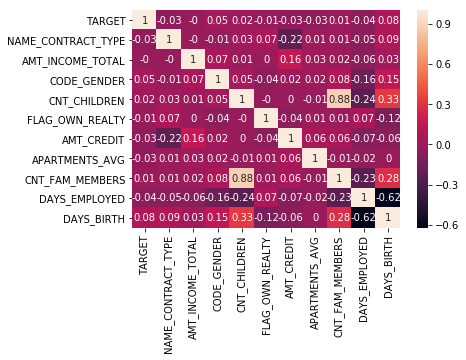

In [14]:
# compute the pair wise correlation for all columns 
# corr() is the function name, round() is how many digit we want to round our values up
correlation_matrix = train_dataset.corr().round(2)

# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [15]:
train_dataset.head()

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,CODE_GENDER,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_CREDIT,APARTMENTS_AVG,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,DAYS_BIRTH
0,1,0,202500.0,1,0,1,406597.5,0.0247,Laborers,1.0,Business Entity Type 3,Single / not married,-637,-9461
1,0,0,270000.0,0,0,0,1293502.5,0.0959,Core staff,2.0,School,Married,-1188,-16765
2,0,1,67500.0,1,0,1,135000.0,NaN,Laborers,1.0,Government,Single / not married,-225,-19046
3,0,0,135000.0,0,0,1,312682.5,NaN,Laborers,2.0,Business Entity Type 3,Civil marriage,-3039,-19005
4,0,0,121500.0,1,0,1,513000.0,NaN,Core staff,1.0,Religion,Single / not married,-3038,-19932


In [16]:
train_dataset['DAYS_BIRTH'] = (train_dataset['DAYS_BIRTH']*(-1))/365.25
train_dataset['DAYS_BIRTH'].head()

0    25.902806
1    45.900068
2    52.145106
3    52.032854
4    54.570842
Name: DAYS_BIRTH, dtype: float64

In [17]:
train_dataset['DAYS_EMPLOYED'] = (train_dataset['DAYS_EMPLOYED']*(-1))/365.25
train_dataset['DAYS_EMPLOYED'].head()

0    1.744011
1    3.252567
2    0.616016
3    8.320329
4    8.317591
Name: DAYS_EMPLOYED, dtype: float64

In [18]:
train_dataset = train_dataset.rename(columns={'DAYS_BIRTH': 'YEAR_BIRTH', 'DAYS_EMPLOYED': 'YEAR_EMPLOYED'})

# Visualization

In [19]:
train_dataset.head()

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,CODE_GENDER,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_CREDIT,APARTMENTS_AVG,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,NAME_FAMILY_STATUS,YEAR_EMPLOYED,YEAR_BIRTH
0,1,0,202500.0,1,0,1,406597.5,0.0247,Laborers,1.0,Business Entity Type 3,Single / not married,1.744011,25.902806
1,0,0,270000.0,0,0,0,1293502.5,0.0959,Core staff,2.0,School,Married,3.252567,45.900068
2,0,1,67500.0,1,0,1,135000.0,NaN,Laborers,1.0,Government,Single / not married,0.616016,52.145106
3,0,0,135000.0,0,0,1,312682.5,NaN,Laborers,2.0,Business Entity Type 3,Civil marriage,8.320329,52.032854
4,0,0,121500.0,1,0,1,513000.0,NaN,Core staff,1.0,Religion,Single / not married,8.317591,54.570842


In [20]:
train_dataset.describe()

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,CODE_GENDER,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_CREDIT,APARTMENTS_AVG,CNT_FAM_MEMBERS,YEAR_EMPLOYED,YEAR_BIRTH
count,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,3.075110e+05,151450.00000,307509.000000,307511.000000,307511.000000
mean,0.080729,0.095213,1.687979e+05,0.341643,0.417052,0.693673,5.990260e+05,0.11744,2.152665,-174.716074,43.906900
std,0.272419,0.293509,2.371231e+05,0.474261,0.722121,0.460968,4.024908e+05,0.10824,0.910682,386.791969,11.947950
min,0.000000,0.000000,2.565000e+04,0.000000,0.000000,0.000000,4.500000e+04,0.00000,1.000000,-999.980835,20.503765
25%,0.000000,0.000000,1.125000e+05,0.000000,0.000000,0.000000,2.700000e+05,0.05770,2.000000,0.791239,33.984942
50%,0.000000,0.000000,1.471500e+05,0.000000,0.000000,1.000000,5.135310e+05,0.08760,2.000000,3.321013,43.121150
75%,0.000000,0.000000,2.025000e+05,1.000000,1.000000,1.000000,8.086500e+05,0.14850,3.000000,7.556468,53.886379
max,1.000000,1.000000,1.170000e+08,1.000000,19.000000,1.000000,4.050000e+06,1.00000,20.000000,49.040383,69.073238


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021222B084A8>,
      dtype=object)

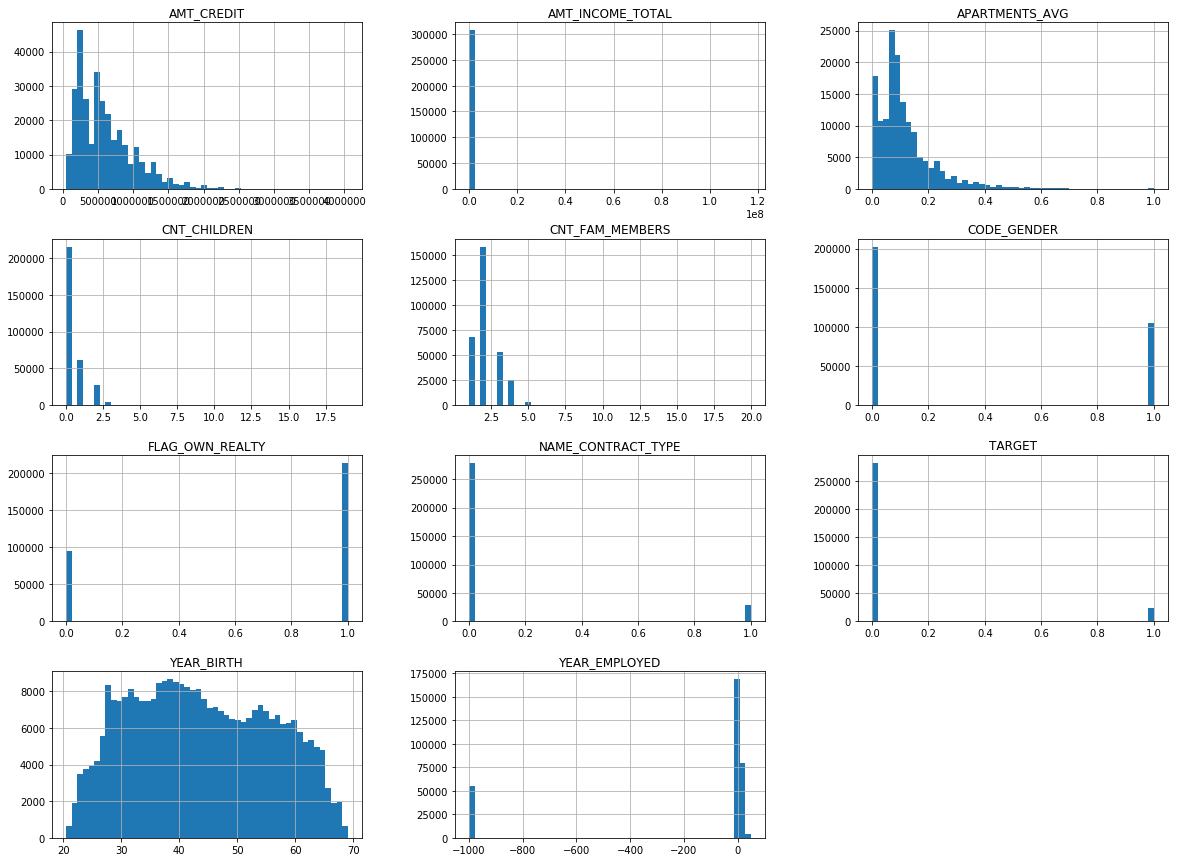

In [38]:
train_dataset.hist(bins=50, figsize=(20,15))

### Get rid of outliner for Income

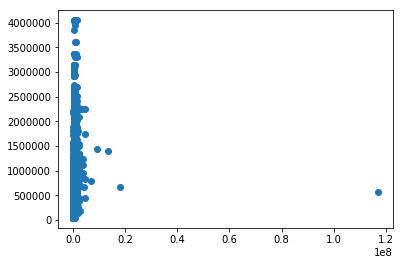

In [21]:
plt.scatter(train_dataset['AMT_INCOME_TOTAL'], train_dataset['AMT_CREDIT'])

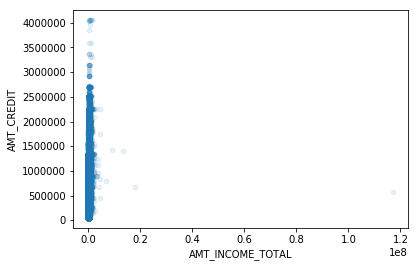

In [22]:
train_dataset.plot(kind="scatter", x="AMT_INCOME_TOTAL", y="AMT_CREDIT", alpha=0.1)

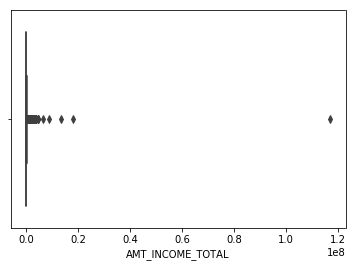

In [29]:
sns.boxplot(x=train_dataset['AMT_INCOME_TOTAL'])

In [39]:
from scipy import stats

z_score = np.abs(stats.zscore(train_dataset['AMT_INCOME_TOTAL']))
print(z_score)

[0.14212925 0.42679193 0.4271961  ... 0.06662338 0.00928667 0.04764587]


In [42]:
print(np.where(z_score > 20))

(array([ 12840,  77768, 131127, 203693, 246858], dtype=int64),)


In [43]:
max(z_score)

492.70344914541477

In [23]:
max(train_dataset['AMT_INCOME_TOTAL'])

117000000.0

In [24]:
indexNames = train_dataset[ (train_dataset['AMT_INCOME_TOTAL'] == 117000000.0) ].index
train_dataset.drop(indexNames , inplace=True)

train_dataset.shape

(307510, 14)

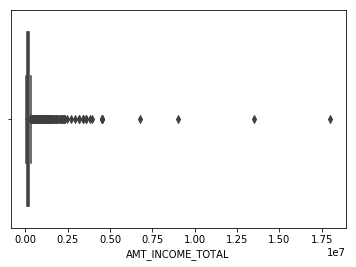

In [48]:
sns.boxplot(x=train_dataset['AMT_INCOME_TOTAL'])

In [25]:
pd.set_option('float_format', '{:f}'.format)

train_dataset['AMT_INCOME_TOTAL'].describe()

count     307510.000000
mean      168417.992784
std       108811.807346
min        25650.000000
25%       112500.000000
50%       147150.000000
75%       202500.000000
max     18000090.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [26]:
Q1=train_dataset['AMT_INCOME_TOTAL'].quantile(0.25)
Q3=train_dataset['AMT_INCOME_TOTAL'].quantile(0.75)
IQR=Q3-Q1
print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print(Lower_Whisker, Upper_Whisker)

Q1:  112500.0
Q3:  202500.0
IQR:  90000.0
-22500.0 337500.0


In [27]:
indexNames = train_dataset[ (train_dataset['AMT_INCOME_TOTAL'] > Upper_Whisker) ].index
train_dataset.drop(indexNames , inplace=True)

train_dataset.shape

(293476, 14)

<Figure size 1080x1080 with 0 Axes>

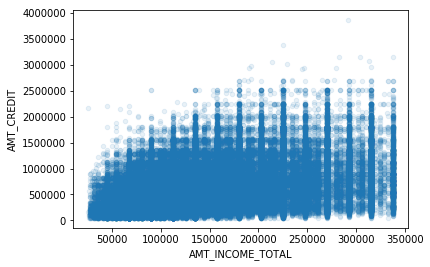

In [28]:
plt.figure(figsize=(15, 15))

train_dataset.plot(kind="scatter", x="AMT_INCOME_TOTAL", y="AMT_CREDIT", alpha=0.1)

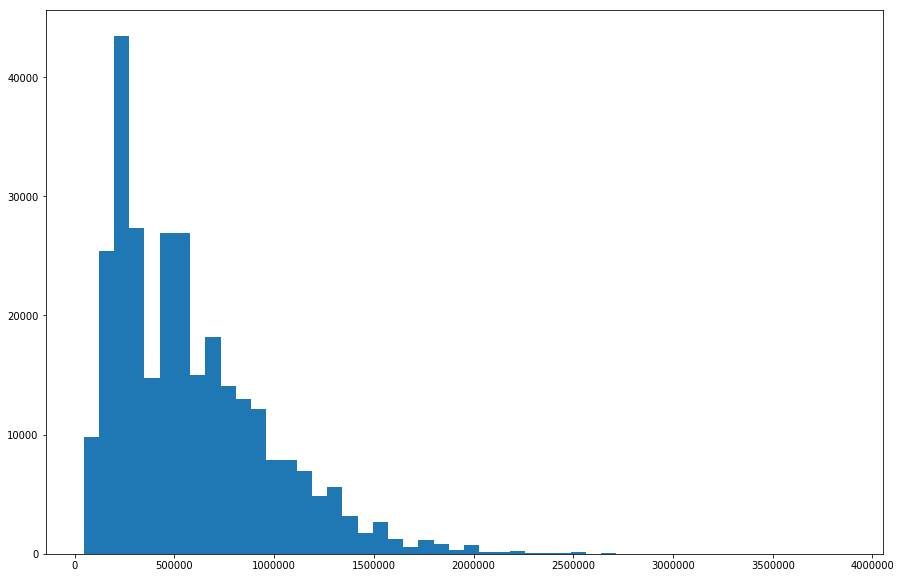

In [71]:
plt.figure(figsize=(15,10))
plt.hist(train_dataset['AMT_CREDIT'], bins = 50)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002122B345390>,
      dtype=object)

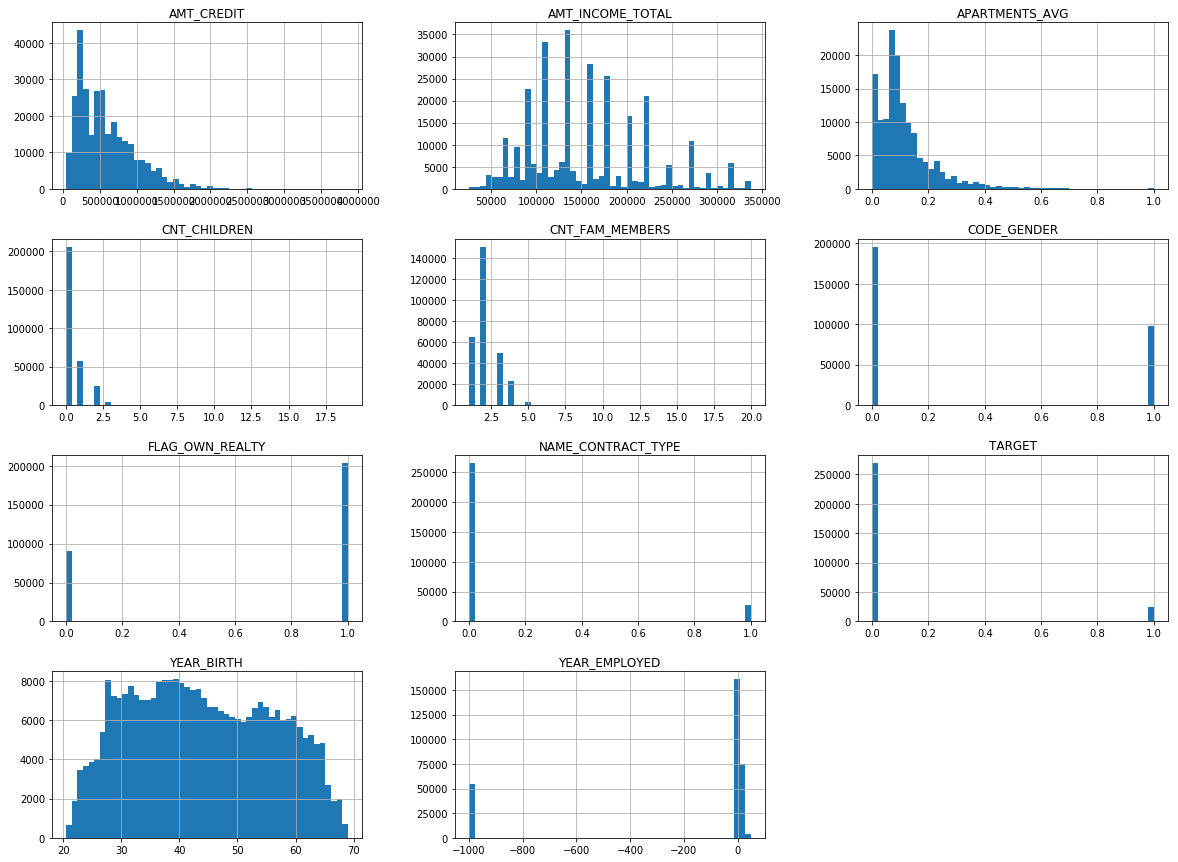

In [72]:
train_dataset.hist(bins=50, figsize=(20,15))

# One Hot

In [29]:
train_dataset.head()

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,CODE_GENDER,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_CREDIT,APARTMENTS_AVG,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,NAME_FAMILY_STATUS,YEAR_EMPLOYED,YEAR_BIRTH
0,1,0,202500.000000,1,0,1,406597.500000,0.024700,Laborers,1.000000,Business Entity Type 3,Single / not married,1.744011,25.902806
1,0,0,270000.000000,0,0,0,1293502.500000,0.095900,Core staff,2.000000,School,Married,3.252567,45.900068
2,0,1,67500.000000,1,0,1,135000.000000,nan,Laborers,1.000000,Government,Single / not married,0.616016,52.145106
3,0,0,135000.000000,0,0,1,312682.500000,nan,Laborers,2.000000,Business Entity Type 3,Civil marriage,8.320329,52.032854
4,0,0,121500.000000,1,0,1,513000.000000,nan,Core staff,1.000000,Religion,Single / not married,8.317591,54.570842


In [30]:
train_dataset['NAME_CONTRACT_TYPE'] = np.where(train_dataset['NAME_CONTRACT_TYPE'] == 1, 'Revolving loans', 'Cash loans') 
train_dataset['NAME_CONTRACT_TYPE'].head()

0         Cash loans
1         Cash loans
2    Revolving loans
3         Cash loans
4         Cash loans
Name: NAME_CONTRACT_TYPE, dtype: object

In [31]:
train_dataset['FLAG_OWN_REALTY'] = np.where(train_dataset['FLAG_OWN_REALTY'] == 1, 'Y', 'N') # change sex to 1 for male and 0 for female
train_dataset['FLAG_OWN_REALTY'].head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: FLAG_OWN_REALTY, dtype: object

In [32]:
train_dataset.head()

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,CODE_GENDER,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_CREDIT,APARTMENTS_AVG,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,NAME_FAMILY_STATUS,YEAR_EMPLOYED,YEAR_BIRTH
0,1,Cash loans,202500.000000,1,0,Y,406597.500000,0.024700,Laborers,1.000000,Business Entity Type 3,Single / not married,1.744011,25.902806
1,0,Cash loans,270000.000000,0,0,N,1293502.500000,0.095900,Core staff,2.000000,School,Married,3.252567,45.900068
2,0,Revolving loans,67500.000000,1,0,Y,135000.000000,nan,Laborers,1.000000,Government,Single / not married,0.616016,52.145106
3,0,Cash loans,135000.000000,0,0,Y,312682.500000,nan,Laborers,2.000000,Business Entity Type 3,Civil marriage,8.320329,52.032854
4,0,Cash loans,121500.000000,1,0,Y,513000.000000,nan,Core staff,1.000000,Religion,Single / not married,8.317591,54.570842


In [33]:
org_type_onehot = pd.get_dummies(train_dataset.ORGANIZATION_TYPE, prefix='ORGANIZATION_TYPE')
print(org_type_onehot.head())

   ORGANIZATION_TYPE_Advertising  ORGANIZATION_TYPE_Agriculture  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   ORGANIZATION_TYPE_Bank  ORGANIZATION_TYPE_Business Entity Type 1  \
0                       0                                         0   
1                       0                                         0   
2                       0                                         0   
3                       0                                         0   
4                       0                                         0   

   ORGANIZATION_TYPE_Business Entity Type 2  \
0                                         0   
1                                         0   
2                            

In [34]:
fam_status_onehot = pd.get_dummies(train_dataset.NAME_FAMILY_STATUS, prefix='NAME_FAMILY_STATUS')
print(fam_status_onehot.head())

   NAME_FAMILY_STATUS_Civil marriage  NAME_FAMILY_STATUS_Married  \
0                                  0                           0   
1                                  0                           1   
2                                  0                           0   
3                                  1                           0   
4                                  0                           0   

   NAME_FAMILY_STATUS_Separated  NAME_FAMILY_STATUS_Single / not married  \
0                             0                                        1   
1                             0                                        0   
2                             0                                        1   
3                             0                                        0   
4                             0                                        1   

   NAME_FAMILY_STATUS_Unknown  NAME_FAMILY_STATUS_Widow  
0                           0                         0  
1                 

In [35]:
type(fam_status_onehot)

pandas.core.frame.DataFrame

In [36]:
occ_type_onehot = pd.get_dummies(train_dataset.OCCUPATION_TYPE, prefix='OCCUPATION_TYPE')
print(occ_type_onehot.head())

   OCCUPATION_TYPE_Accountants  OCCUPATION_TYPE_Cleaning staff  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   

   OCCUPATION_TYPE_Cooking staff  OCCUPATION_TYPE_Core staff  \
0                              0                           0   
1                              0                           1   
2                              0                           0   
3                              0                           0   
4                              0                           1   

   OCCUPATION_TYPE_Drivers  OCCUPATION_TYPE_HR staff  \
0                        0                         0   
1                        0                         0   
2                        0                        

In [37]:
train_dataset['NAME_CONTRACT_TYPE'] = np.where(train_dataset['NAME_CONTRACT_TYPE'] == 'Revolving loans', 1, 0) 
train_dataset['NAME_CONTRACT_TYPE'].head()

0    0
1    0
2    1
3    0
4    0
Name: NAME_CONTRACT_TYPE, dtype: int32

In [38]:
train_dataset['FLAG_OWN_REALTY'] = np.where(train_dataset['FLAG_OWN_REALTY'] == 'Y', 1, 0) # change sex to 1 for male and 0 for female
train_dataset['FLAG_OWN_REALTY'].head()

0    1
1    0
2    1
3    1
4    1
Name: FLAG_OWN_REALTY, dtype: int32

In [39]:
train_dataset.head()

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,CODE_GENDER,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_CREDIT,APARTMENTS_AVG,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,NAME_FAMILY_STATUS,YEAR_EMPLOYED,YEAR_BIRTH
0,1,0,202500.000000,1,0,1,406597.500000,0.024700,Laborers,1.000000,Business Entity Type 3,Single / not married,1.744011,25.902806
1,0,0,270000.000000,0,0,0,1293502.500000,0.095900,Core staff,2.000000,School,Married,3.252567,45.900068
2,0,1,67500.000000,1,0,1,135000.000000,nan,Laborers,1.000000,Government,Single / not married,0.616016,52.145106
3,0,0,135000.000000,0,0,1,312682.500000,nan,Laborers,2.000000,Business Entity Type 3,Civil marriage,8.320329,52.032854
4,0,0,121500.000000,1,0,1,513000.000000,nan,Core staff,1.000000,Religion,Single / not married,8.317591,54.570842


In [40]:
train_dataset = pd.concat([train_dataset, 
                        org_type_onehot, 
                        fam_status_onehot, 
                        occ_type_onehot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
train_dataset = train_dataset.drop(['OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_FAMILY_STATUS'], axis=1)

In [41]:
train_dataset.head()

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,CODE_GENDER,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_CREDIT,APARTMENTS_AVG,CNT_FAM_MEMBERS,YEAR_EMPLOYED,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,1,0,202500.000000,1,0,1,406597.500000,0.024700,1.000000,1.744011,...,1,0,0,0,0,0,0,0,0,0
1,0,0,270000.000000,0,0,0,1293502.500000,0.095900,2.000000,3.252567,...,0,0,0,0,0,0,0,0,0,0
2,0,1,67500.000000,1,0,1,135000.000000,nan,1.000000,0.616016,...,1,0,0,0,0,0,0,0,0,0
3,0,0,135000.000000,0,0,1,312682.500000,nan,2.000000,8.320329,...,1,0,0,0,0,0,0,0,0,0
4,0,0,121500.000000,1,0,1,513000.000000,nan,1.000000,8.317591,...,0,0,0,0,0,0,0,0,0,0


In [42]:
train_dataset.shape

(293476, 93)

In [43]:
pd.options.display.float_format = '{:,.0f}'.format
train_dataset.head()

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,CODE_GENDER,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_CREDIT,APARTMENTS_AVG,CNT_FAM_MEMBERS,YEAR_EMPLOYED,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,1,0,"202,500",1,0,1,"406,598",0,1,2,...,1,0,0,0,0,0,0,0,0,0
1,0,0,"270,000",0,0,0,"1,293,502",0,2,3,...,0,0,0,0,0,0,0,0,0,0
2,0,1,"67,500",1,0,1,"135,000",nan,1,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,"135,000",0,0,1,"312,682",nan,2,8,...,1,0,0,0,0,0,0,0,0,0
4,0,0,"121,500",1,0,1,"513,000",nan,1,8,...,0,0,0,0,0,0,0,0,0,0


In [44]:
train_dataset['AMT_INCOME_TOTAL'] = train_dataset['AMT_INCOME_TOTAL']/1000
train_dataset['AMT_CREDIT'] = train_dataset['AMT_CREDIT']/1000

train_dataset = train_dataset.rename(columns={'AMT_INCOME_TOTAL': 'AMT_INCOME_TOTAL_THOUSAND_DOLLAR', 'AMT_CREDIT': 'AMT_CREDIT_THOUSAND_DOLLAR'})
train_dataset.head()

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,CODE_GENDER,CNT_CHILDREN,FLAG_OWN_REALTY,AMT_CREDIT_THOUSAND_DOLLAR,APARTMENTS_AVG,CNT_FAM_MEMBERS,YEAR_EMPLOYED,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,1,0,202,1,0,1,407,0,1,2,...,1,0,0,0,0,0,0,0,0,0
1,0,0,270,0,0,0,"1,294",0,2,3,...,0,0,0,0,0,0,0,0,0,0
2,0,1,68,1,0,1,135,nan,1,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,135,0,0,1,313,nan,2,8,...,1,0,0,0,0,0,0,0,0,0
4,0,0,122,1,0,1,513,nan,1,8,...,0,0,0,0,0,0,0,0,0,0


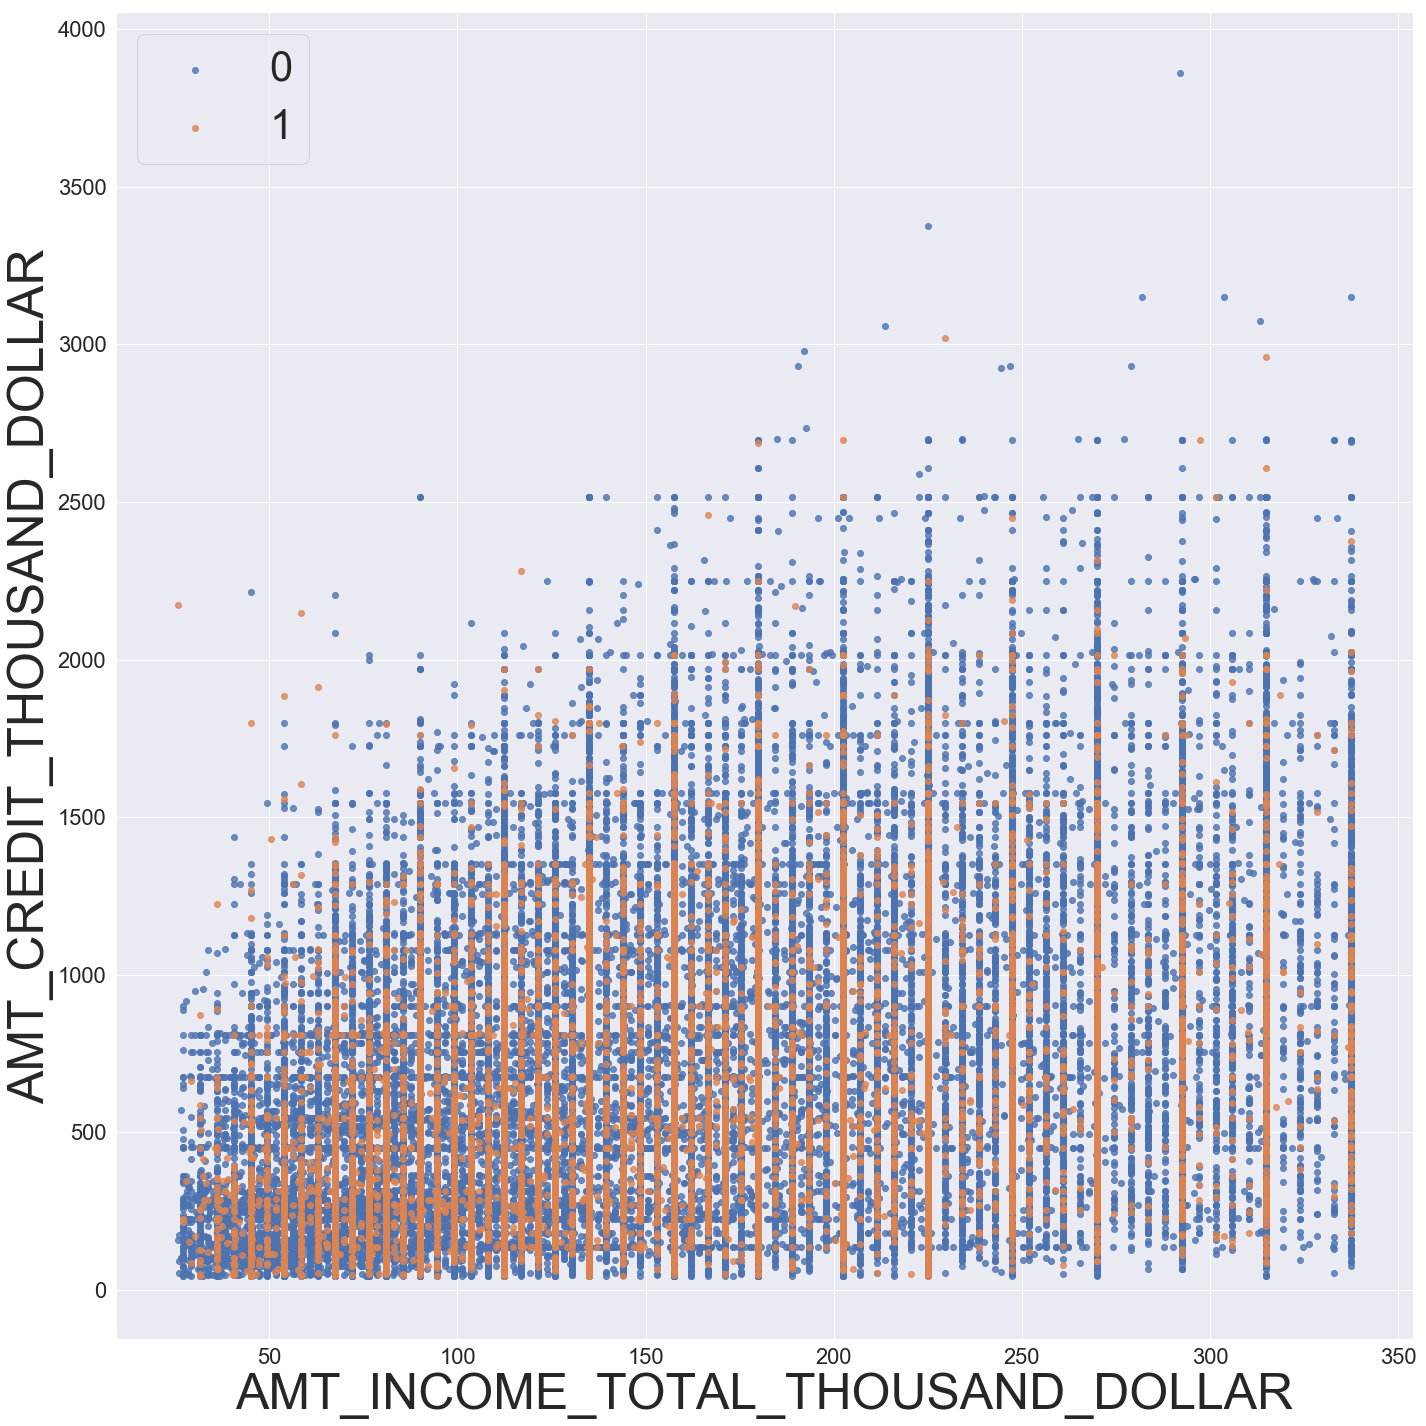

In [48]:
sns.set(font_scale = 2)

ax = sns.lmplot( x="AMT_INCOME_TOTAL_THOUSAND_DOLLAR", y="AMT_CREDIT_THOUSAND_DOLLAR", data=train_dataset, fit_reg=False, hue='TARGET', height=20, legend=False)
plt.legend(loc='upper left', fontsize = 'xx-large')

ax.set_xlabels("AMT_INCOME_TOTAL_THOUSAND_DOLLAR",fontsize=50)
ax.set_ylabels("AMT_CREDIT_THOUSAND_DOLLAR",fontsize=50)

plt.show()

In [52]:
train_dataset.shape

(293476, 93)

In [53]:
train_dataset.to_csv('Econ265_Final_Dataset.csv')